In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

print("Reading data...")

df_vectors = pd.read_parquet("../data/raw/music_lyrics_vectors.parquet", columns=['pk', 'vector'])
df_metadata = pd.read_parquet("../data/raw/music_metadata.parquet", columns=['id', 'tag'])
df_vectors.columns = ["id", "vector"]

Reading data...


In [2]:
merged = df_metadata.merge(df_vectors, on="id")
merged

,id,tag,vector
0,1,rap,"[-0.011763700284063816, 0.04868641868233681, 0..."
1,3,rap,"[0.03364945948123932, 0.03923477604985237, 0.0..."
2,4,rap,"[0.03684891015291214, 0.032235532999038696, 0...."
3,5,rap,"[0.040889911353588104, 0.034137848764657974, 0..."
4,6,rap,"[0.03938153386116028, 0.045250315219163895, 0...."
...,...,...,...
3399988,7882838,pop,"[0.03994699940085411, 0.013582070358097553, 0...."
3399989,7882840,pop,"[0.05568535253405571, 0.021076645702123642, 0...."
3399990,7882842,pop,"[0.02669597789645195, 0.049316588789224625, 0...."
3399991,7882845,pop,"[-0.005534455180168152, 0.05278952047228813, 0..."


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

data = merged[~merged['vector'].isnull()].sample(n=100000)
X = np.vstack(data['vector'])
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
n_clusters = 6

# Apply KMeans clustering on the training set
K = range(1, 10)
distortions = []
for k in K:
    model = KMeans(n_clusters=k).fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])
distortions

[0.38204030420093393,
 0.35880177336543045,
 0.3541489796350198,
 0.340783667797726,
 0.33594574160135837,
 0.33311887826630293,
 0.3307065693755438,
 0.3274544900260482,
 0.32559419190147093]

Text(0.5, 1.0, 'Elbow Curve')

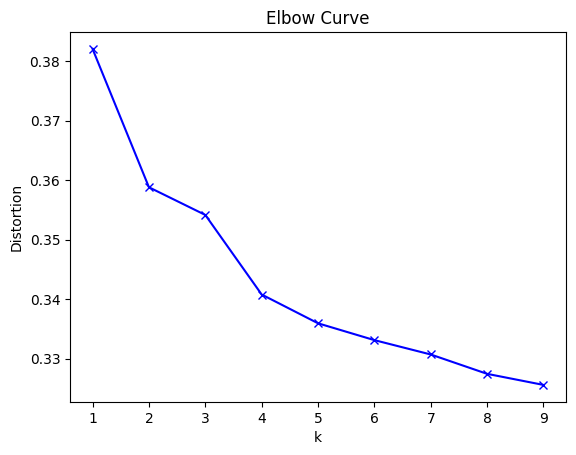

In [42]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title("Elbow Curve")

In [43]:
model = KMeans(4, init="k-means++", random_state=3425)
model.fit(X_train)

KMeans(n_clusters=4, random_state=3425)

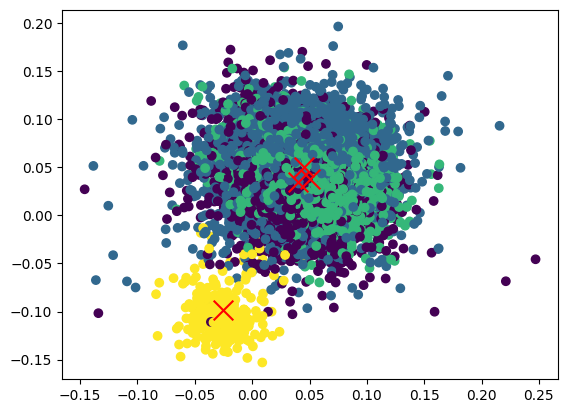

In [44]:
y_pred = model.fit_predict(X_train)
centers = model.cluster_centers_
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=200, label='Cluster Centers')
plt.show()

(array([25769.,     0.,     0., 30614.,     0.,     0., 43271.,     0.,
            0.,   346.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

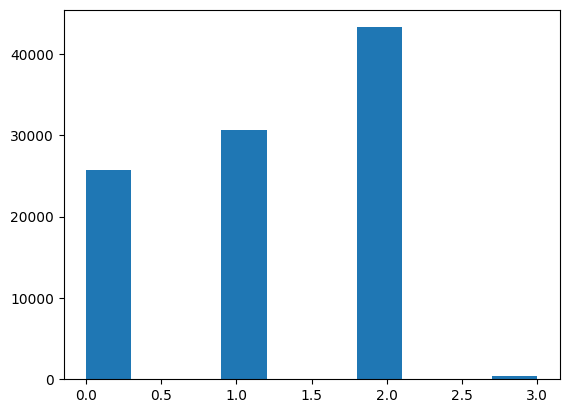

In [47]:
pred = model.predict(X)
plt.hist(pred)

In [49]:
pred = model.predict(X)
data['cluster'] = None
for index, value in enumerate(pred):
    data.iloc[index, len(data.columns) - 1] = value

count     41200
unique        4
top           2
freq      22575
Name: cluster, dtype: int64


(array([ 5223.,     0.,     0., 13296.,     0.,     0., 22575.,     0.,
            0.,   106.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

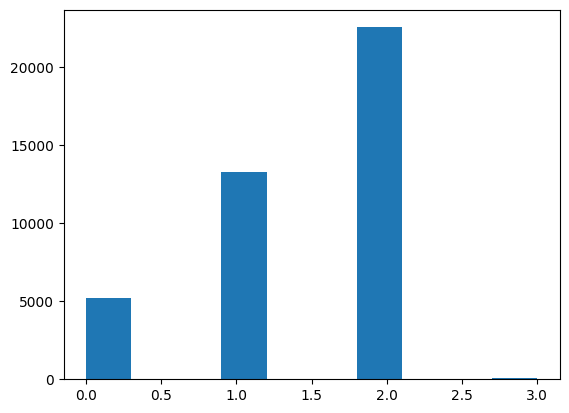

In [ ]:
rock = data[data['tag'] == 'pop']
print(rock['cluster'].describe())
plt.hist(rock['cluster'])

count     28574
unique        4
top           0
freq      17084
Name: cluster, dtype: int64


(array([17084.,     0.,     0.,  4239.,     0.,     0.,  7097.,     0.,
            0.,   154.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

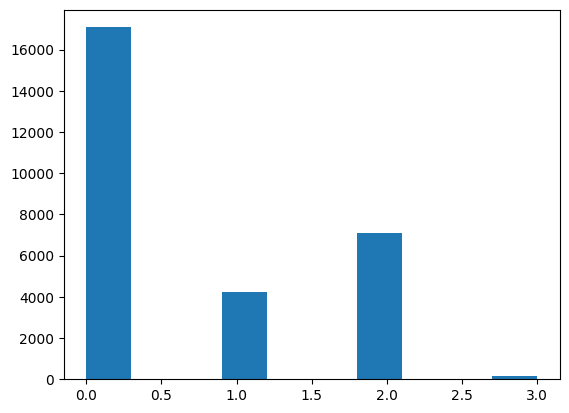

In [53]:
rap = data[data['tag'] == 'rap']
print(rap['cluster'].describe())
plt.hist(rap['cluster'])